<Figure size 1008x360 with 0 Axes>

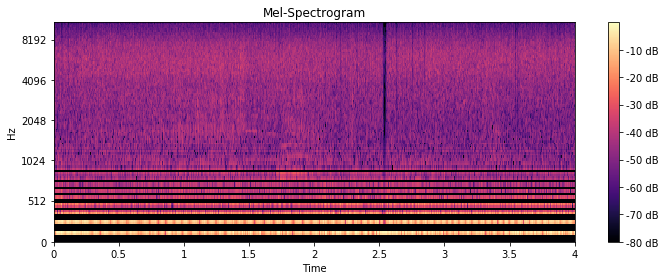

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import torchaudio, torch, librosa.display, librosa
import IPython.display as ipd
import numpy as np

name = 't3_audio_00125.wav'
device = torch.device('cuda:1')

ipd.Audio(name)

wav, sr = torchaudio.load(name, normalization=True)

# wav = torchaudio.transforms.Resample(sr, 16000).to(device)(wav.to(device))
# sr = 16000
wav = wav.to(device)
mel = torchaudio.transforms.MelSpectrogram(sample_rate=sr).to(device)
plt.figure(figsize=(14, 5))

meldata = mel(wav[0]).cpu().numpy()

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(meldata, ref=np.max), y_axis='mel', sr=sr, hop_length=200, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.savefig('Mel-Spectrogram example.png')
plt.show()

In [2]:
ipd.Audio(name)

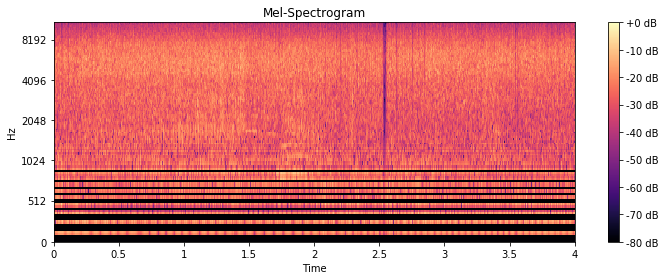

In [9]:
highwav = torchaudio.functional.highpass_biquad(wav,sr, 1000)

meldata = mel(highwav[0]).cpu().numpy()
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(meldata, ref=np.max), y_axis='mel', sr=sr, hop_length=200, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.savefig('Mel-Spectrogram example.png')
plt.show()

In [10]:
torchaudio.save('test.wav', highwav.cpu(), sample_rate=sr)

In [11]:
ipd.Audio('test.wav')